In [6]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import cv2
import os
import pickle
from dataset.mask_functions import rle2mask, mask2rle

%matplotlib inline

In [7]:
train_fname_list = glob('../data/raw/train/*')
test_fname_list = glob('../data/raw/test/*')

len(train_fname_list), len(test_fname_list)

(5546, 3698)

In [3]:
train_df = pd.read_csv('../data/raw/train.csv')
train_df.head(5)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [4]:
train_df.Image_Label.count()

22184

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20, 15))

for idx, fname in enumerate(np.random.choice(train_fname_list, 20)):
    img = plt.imread(fname)#[:,:,0]
    axes[idx//4, idx%4].imshow(img)

In [8]:
fname = train_fname_list[0]
img = plt.imread(fname)

In [9]:
img.shape

(1400, 2100, 3)

In [10]:
img = cv2.imread(fname)
img.shape

(1400, 2100, 3)

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
img = cv2.resize(img, (512, 768))

In [14]:
img.shape

(768, 512)

In [15]:
img = img / 255

In [16]:
img

array([[0.08627451, 0.08627451, 0.08627451, ..., 0.        , 0.        ,
        0.        ],
       [0.08627451, 0.08627451, 0.08627451, ..., 0.        , 0.        ,
        0.        ],
       [0.08627451, 0.08627451, 0.08627451, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.8745098 , 0.8627451 ,
        0.87058824],
       [0.        , 0.        , 0.        , ..., 0.86666667, 0.8627451 ,
        0.87058824],
       [0.        , 0.        , 0.        , ..., 0.85882353, 0.86666667,
        0.8745098 ]])

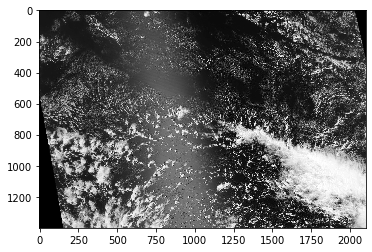

In [83]:
plt.imshow(img, cmap=plt.cm.gray)

In [41]:
## if not built, build and save
train_mask = pd.read_csv('../data/raw/train.csv')
train_mask.sort_values(by=['Image_Label'], inplace=True)
train_mask['ImageId'] = train_mask['Image_Label'].apply(lambda x: x.split('_')[0])
img_id_list = train_mask.ImageId.unique()
train_mask['ClassId'] = train_mask['Image_Label'].apply(lambda x: x.split('_')[1]).astype(str)
d = {'Fish':0, 'Flower':1, 'Gravel':2, 'Sugar':3}
train_mask['ClassId'] = [d[c] for c in train_mask.ClassId]

train_mask['EncodedPixels'] = train_mask.EncodedPixels.fillna('')
train_mask.set_index(['ImageId'], inplace=True)
train_mask['has_mask'] = (train_mask.EncodedPixels!='').astype(np.int)
train_mask['mask_class'] = train_mask['ClassId']*train_mask['has_mask']

In [42]:
train_mask.head(5)

,Image_Label,EncodedPixels,ClassId,has_mask,mask_class
ImageId,,,,,
0011165.jpg,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0,1,0
0011165.jpg,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,1,1,1
0011165.jpg,0011165.jpg_Gravel,,2,0,0
0011165.jpg,0011165.jpg_Sugar,,3,0,0
002be4f.jpg,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,0,1,0


In [47]:
train_mask.reset_index().groupby(['ImageId'])['has_mask'].agg(['count', 'sum'])['sum'].value_counts()

2    2372
3    1560
1    1348
4     266
Name: sum, dtype: int64

In [64]:
train_mask.mask_class.value_counts()

0    13129
3     3751
2     2939
1     2365
Name: mask_class, dtype: int64

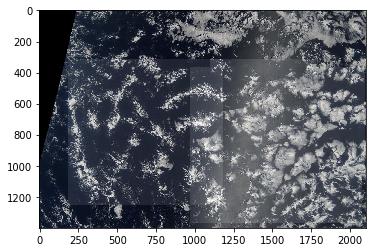

In [61]:
img = plt.imread('../data/raw/train/0011165.jpg')
plt.imshow(img, cmap=plt.cm.gray)

mask = rle2mask(mask_data['0011165.jpg'][0])
plt.imshow(mask, cmap=plt.cm.gray, alpha=0.1)

mask = rle2mask(mask_data['0011165.jpg'][1])
plt.imshow(mask, cmap=plt.cm.gray, alpha=0.1)

In [1]:
(1400, 2100)

(1400, 2100)

In [5]:
(512, 768)

(512, 768)